### Standardization 

Standardization is one of the feature scaling techniques which scales down the data in such a way that the algorithms (like KNN, Logistic Regression, etc.) which are dependent on distance and weights should not get affected by uneven-scaled datasets because if it happens, then, the model accuracy will not be good (will show this practically), on the other hand, if we will scale the data evenly in such a way that the data points are mean centric and standard deviation of the distribution is 1 then the weights will be treated equally by the algorithm giving the more relevant and accurate results.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 2), (120, 2), (280,), (120,))

## Standardscaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set , it will learn the parametres & calculate the mean & sd for the train set features

scaler.fit(X_train)

StandardScaler()

In [7]:
# mean of feature age & salary
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
# variance of feature Age & Salary
scaler.var_

array([1.04038724e+02, 1.19572709e+09])

In [9]:
# Transform train & test Sets , it will give array of X_train_scaled & X_test_scaled
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# cinvert array into dataframes 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
# after standardization mean is zero & sd is 1 for each feature
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [12]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


In [13]:
#before standardization
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_test.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


## Effect of Scaling

Scatter Plot 

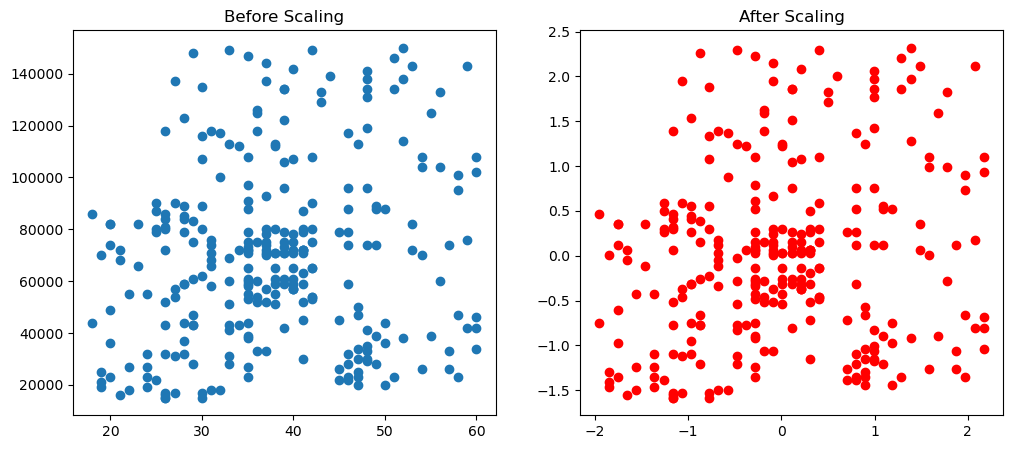

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

Probability density function plot 

## kernel density estimate (KDE) plot 
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 
KDE represents the data using a continuous probability density curve in one or more dimensions.

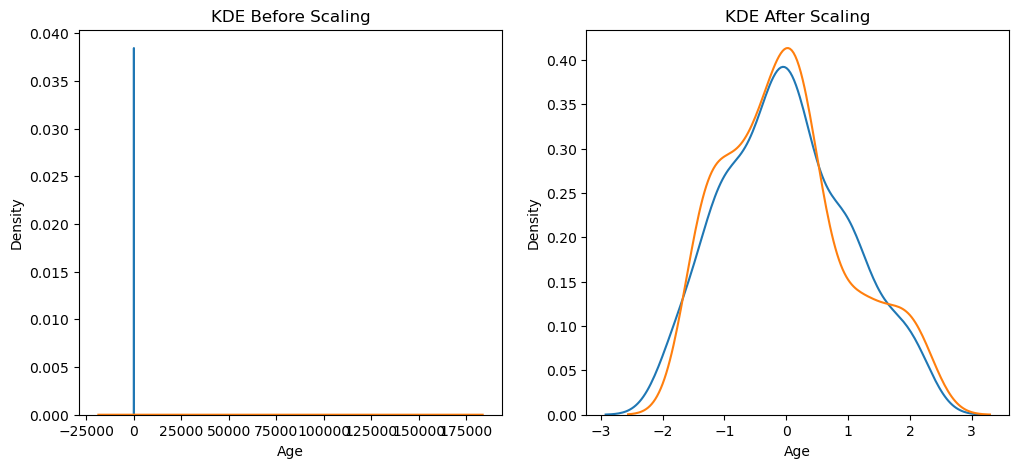

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#bfore scaling
ax1.set_title("KDE Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title("KDE After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Comparison of Distributions

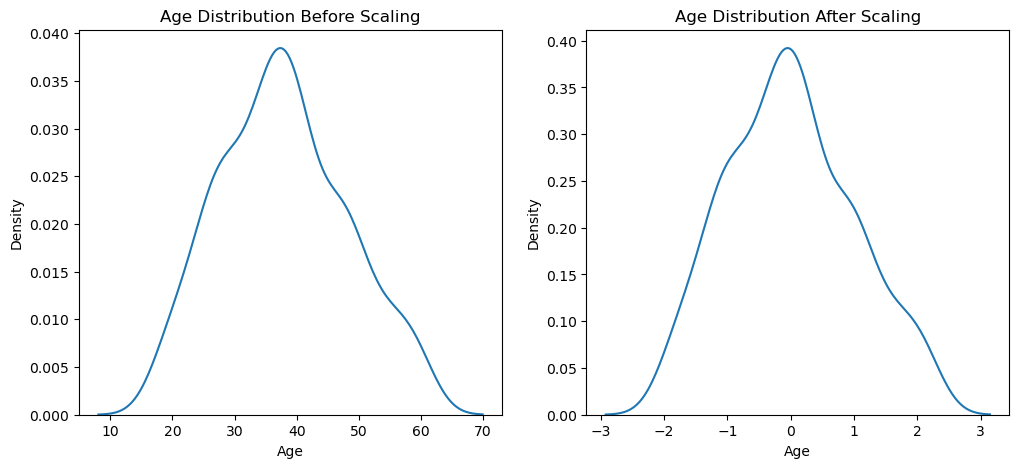

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#bfore scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)


#after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

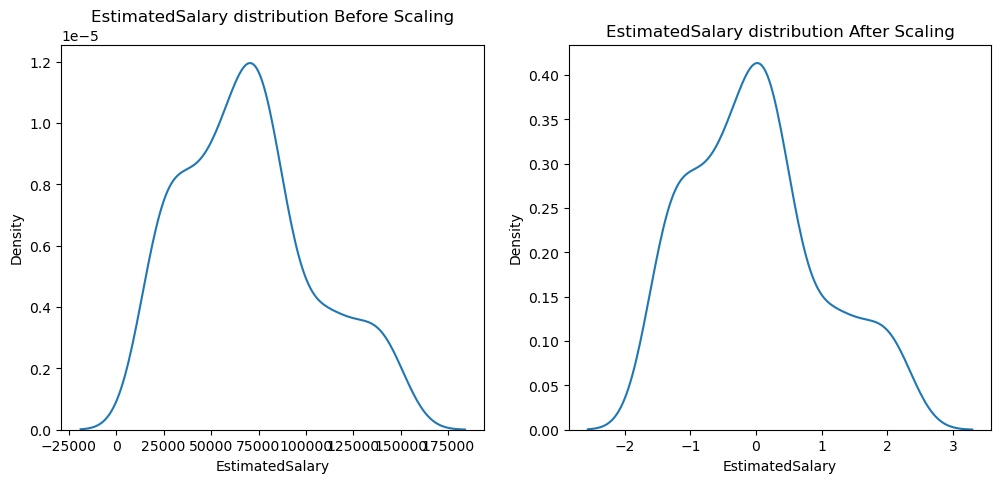

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#bfore scaling
ax1.set_title("EstimatedSalary distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title("EstimatedSalary distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Why Scaling is Important 

Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr_scaled = LogisticRegression()

In [20]:
#fitting logistic regression on without scaled data & with scaled data
Lr.fit(X_train,y_train)
Lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [21]:
#predict y hat 
y_pred = Lr.predict(X_test)
y_pred_scaled = Lr_scaled.predict(X_test_scaled)

In [22]:
# check accuracy of model 
from sklearn.metrics import accuracy_score
print("Model Accuracy without feature scaling", accuracy_score(y_test,y_pred))
print("Model Accuracy with feature scaling", accuracy_score(y_test,y_pred_scaled))   

Model Accuracy without feature scaling 0.6583333333333333
Model Accuracy with feature scaling 0.8666666666666667


Inference: In the above code, we imported Logistic Regression first and followed every step the same as we did before to scale the data using a standard scaler, and when we compared the accuracy of the model of Actual data with the Scaled data then we found out that scaling the data in the case of this algorithm helps quite well as the accuracy increased from 65% to 87%.

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [24]:
#fitting Decision Tree classifier on without scaled data & with scaled data
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [25]:
y_pred= dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [26]:
# check accuracy of model 
print("Model Accuracy without feature scaling", accuracy_score(y_test,y_pred))
print("Model Accuracy with feature scaling", accuracy_score(y_test,y_pred_scaled))   

Model Accuracy without feature scaling 0.875
Model Accuracy with feature scaling 0.875


Inference: As we did in the case of the previous ML algorithm same, we did in the case of the Decision Tree classifier but in this case, we can see that scaling has not improved the accuracy of the model as scaling is helpful in the algorithms like KNN, PCA and other which are dependent on distance.

## Effect of Outlier After Standardization

In [27]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df

/tmp/ipykernel_70/4162112257.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


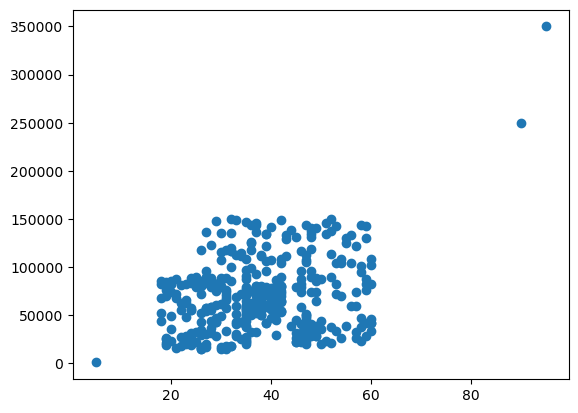

In [28]:
#see outliers through scatter plot
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((282, 2), (121, 2), (282,), (121,))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [32]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

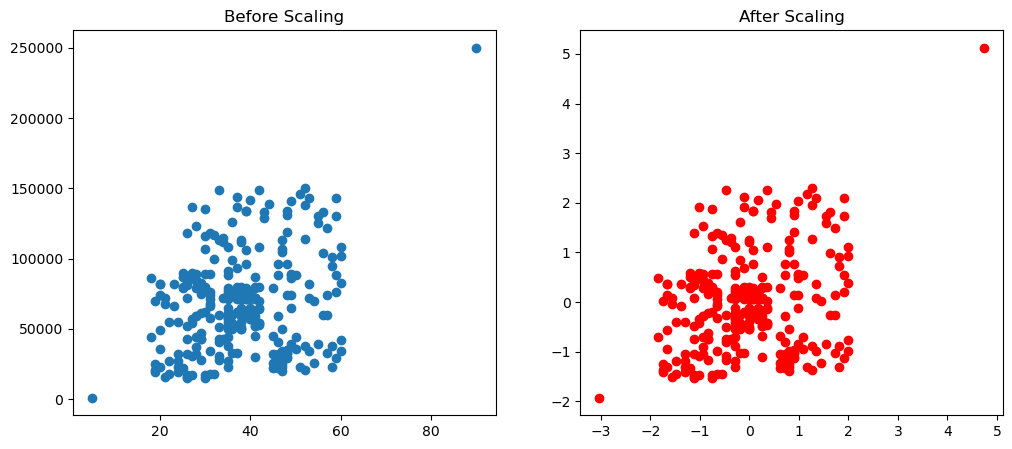

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

Inference: From the above code, we have plotted both stimulations before and after scaling and from the results, it is visible that standard scaling does not affect outliers, as the data points have not changed their positions at all.

## Conclusion

1. First, we got started with the introduction part, where we discussed standard scaling and then we came to know the importance of train test split before applying standardization.
2. Then we compared the distribution of the dataset in both cases, i.e., for actual and after scaling datasets to which, after looking at the distribution, we got conclusive evidence that distributions are not changed.
3. Then we learned about why scaling is important by comparing the two most used algorithms (but with different mathematics intuition behind them). The last topic was the effect on outliers, to which we saw the plot and inference that there is no effect of outliers.